In [219]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import seaborn as sns

## Loading dataset

In [140]:
d=pd.read_excel('Data_Train.xlsx')
d

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [141]:
d1=pd.read_excel('Test_set.xlsx')
d1

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info
...,...,...,...,...,...,...,...,...,...,...
2666,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info
2669,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info


In [142]:
df=d.append(d1)
df

C:\Users\Rishi\AppData\Local\Temp\ipykernel_3292\3600839878.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=d.append(d1)


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0
...,...,...,...,...,...,...,...,...,...,...,...
2666,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info,NaN
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info,NaN
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info,NaN
2669,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info,NaN


In [143]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13354 entries, 0 to 2670
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13354 non-null  object 
 1   Date_of_Journey  13354 non-null  object 
 2   Source           13354 non-null  object 
 3   Destination      13354 non-null  object 
 4   Route            13353 non-null  object 
 5   Dep_Time         13354 non-null  object 
 6   Arrival_Time     13354 non-null  object 
 7   Duration         13354 non-null  object 
 8   Total_Stops      13353 non-null  object 
 9   Additional_Info  13354 non-null  object 
 10  Price            10683 non-null  float64
dtypes: float64(1), object(10)
memory usage: 1.2+ MB


In [144]:
df['date']=df['Date_of_Journey'].str.split('/').str[0]
df['month']=df['Date_of_Journey'].str.split('/').str[1]
df['year']=df['Date_of_Journey'].str.split('/').str[2]

In [145]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,date,month,year
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0,24,03,2019
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,1,05,2019
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0,9,06,2019
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,12,05,2019
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,01,03,2019


In [146]:
df['date']=df['date'].astype(int)
df['month']=df['month'].astype(int)
df['year']=df['year'].astype(int)

In [147]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13354 entries, 0 to 2670
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13354 non-null  object 
 1   Date_of_Journey  13354 non-null  object 
 2   Source           13354 non-null  object 
 3   Destination      13354 non-null  object 
 4   Route            13353 non-null  object 
 5   Dep_Time         13354 non-null  object 
 6   Arrival_Time     13354 non-null  object 
 7   Duration         13354 non-null  object 
 8   Total_Stops      13353 non-null  object 
 9   Additional_Info  13354 non-null  object 
 10  Price            10683 non-null  float64
 11  date             13354 non-null  int32  
 12  month            13354 non-null  int32  
 13  year             13354 non-null  int32  
dtypes: float64(1), int32(3), object(10)
memory usage: 1.4+ MB


In [148]:
df.drop('Date_of_Journey',axis=1,inplace=True)

In [149]:
df

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,date,month,year
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0,24,3,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,1,5,2019
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0,9,6,2019
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,12,5,2019
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,1,3,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,Air India,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info,NaN,6,6,2019
2667,IndiGo,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info,NaN,27,3,2019
2668,Jet Airways,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info,NaN,6,3,2019
2669,Air India,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info,NaN,6,3,2019


In [151]:
df['Arrival_Time'].str.split(' ').str[0]

0       01:10
1       13:15
2       04:25
3       23:30
4       21:35
        ...  
2666    20:25
2667    16:55
2668    04:25
2669    19:15
2670    19:15
Name: Arrival_Time, Length: 13354, dtype: object

In [152]:
df['Arrival_Time']=df['Arrival_Time'].str.split(' ').str[0]

In [153]:
df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,date,month,year
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10,2h 50m,non-stop,No info,3897.0,24,3,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,1,5,2019
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25,19h,2 stops,No info,13882.0,9,6,2019
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,12,5,2019
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,1,3,2019


In [154]:
df.isnull().sum()

Airline               0
Source                0
Destination           0
Route                 1
Dep_Time              0
Arrival_Time          0
Duration              0
Total_Stops           1
Additional_Info       0
Price              2671
date                  0
month                 0
year                  0
dtype: int64

In [155]:
df['arival_hour']=df['Arrival_Time'].apply(lambda x:x.split(':')[0])
df['arival_min']=df['Arrival_Time'].apply(lambda x:x.split(':')[1])

In [156]:
df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,date,month,year,arival_hour,arival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10,2h 50m,non-stop,No info,3897.0,24,3,2019,01,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,1,5,2019,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25,19h,2 stops,No info,13882.0,9,6,2019,04,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,12,5,2019,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,1,3,2019,21,35


In [157]:
df['dep_hour']=df['Dep_Time'].apply(lambda x:x.split(':')[0])
df['dep_min']=df['Dep_Time'].apply(lambda x:x.split(':')[1])

In [158]:
df

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,date,month,year,arival_hour,arival_min,dep_hour,dep_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10,2h 50m,non-stop,No info,3897.0,24,3,2019,01,10,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,1,5,2019,13,15,05,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25,19h,2 stops,No info,13882.0,9,6,2019,04,25,09,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,12,5,2019,23,30,18,05
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,1,3,2019,21,35,16,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,Air India,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25,23h 55m,1 stop,No info,NaN,6,6,2019,20,25,20,30
2667,IndiGo,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info,NaN,27,3,2019,16,55,14,20
2668,Jet Airways,Delhi,Cochin,DEL → BOM → COK,21:50,04:25,6h 35m,1 stop,No info,NaN,6,3,2019,04,25,21,50
2669,Air India,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info,NaN,6,3,2019,19,15,04,00


In [159]:
df.drop(['Dep_Time','Arrival_Time'],axis=1,inplace=True)

In [160]:
df.head(2)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,date,month,year,arival_hour,arival_min,dep_hour,dep_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897.0,24,3,2019,01,10,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662.0,1,5,2019,13,15,05,50


In [161]:
df['arival_hour']=df['arival_hour'].astype(int)
df['arival_min']=df['arival_min'].astype(int)

In [162]:
df['dep_hour']=df['dep_hour'].astype(int)
df['dep_min']=df['dep_min'].astype(int)

In [163]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13354 entries, 0 to 2670
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13354 non-null  object 
 1   Source           13354 non-null  object 
 2   Destination      13354 non-null  object 
 3   Route            13353 non-null  object 
 4   Duration         13354 non-null  object 
 5   Total_Stops      13353 non-null  object 
 6   Additional_Info  13354 non-null  object 
 7   Price            10683 non-null  float64
 8   date             13354 non-null  int32  
 9   month            13354 non-null  int32  
 10  year             13354 non-null  int32  
 11  arival_hour      13354 non-null  int32  
 12  arival_min       13354 non-null  int32  
 13  dep_hour         13354 non-null  int32  
 14  dep_min          13354 non-null  int32  
dtypes: float64(1), int32(7), object(7)
memory usage: 1.3+ MB


In [164]:
df['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', nan, '4 stops'],
      dtype=object)

In [165]:
df['Total_Stops'].value_counts()

1 stop      7056
non-stop    4340
2 stops     1899
3 stops       56
4 stops        2
Name: Total_Stops, dtype: int64

In [166]:
df.isnull().sum()

Airline               0
Source                0
Destination           0
Route                 1
Duration              0
Total_Stops           1
Additional_Info       0
Price              2671
date                  0
month                 0
year                  0
arival_hour           0
arival_min            0
dep_hour              0
dep_min               0
dtype: int64

In [167]:
df['Total_Stops']=df['Total_Stops'].map({'non-stop':0, '1 stop':1, '2 stops':2, '3 stops':3, '4 stops':4})

In [168]:
df[df['Total_Stops'].isnull()]

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,date,month,year,arival_hour,arival_min,dep_hour,dep_min
9039,Air India,Delhi,Cochin,NaN,23h 40m,NaN,No info,7480.0,6,5,2019,9,25,9,45


In [169]:
df=df.drop(9039,axis=0)

In [170]:
df.shape

(13353, 15)

In [171]:
df['dur_hour']=df['Duration'].str.split(' ').str[0].str.split('h').str[0]

In [172]:
df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,date,month,year,arival_hour,arival_min,dep_hour,dep_min,dur_hour
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,0.0,No info,3897.0,24,3,2019,1,10,22,20,2
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2.0,No info,7662.0,1,5,2019,13,15,5,50,7
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2.0,No info,13882.0,9,6,2019,4,25,9,25,19
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1.0,No info,6218.0,12,5,2019,23,30,18,5,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1.0,No info,13302.0,1,3,2019,21,35,16,50,4


In [173]:
df[df['Duration']=='5m']

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,date,month,year,arival_hour,arival_min,dep_hour,dep_min,dur_hour
6474,Air India,Mumbai,Hyderabad,BOM → GOI → PNQ → HYD,5m,2.0,No info,17327.0,6,3,2019,16,55,16,50,5m
2660,Air India,Mumbai,Hyderabad,BOM → GOI → PNQ → HYD,5m,2.0,No info,NaN,12,3,2019,16,55,16,50,5m


In [174]:
df.drop(6474,axis=0,inplace=True)
df.drop(2660,axis=0,inplace=True)

In [175]:
df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,date,month,year,arival_hour,arival_min,dep_hour,dep_min,dur_hour
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,0.0,No info,3897.0,24,3,2019,1,10,22,20,2
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2.0,No info,7662.0,1,5,2019,13,15,5,50,7
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2.0,No info,13882.0,9,6,2019,4,25,9,25,19
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1.0,No info,6218.0,12,5,2019,23,30,18,5,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1.0,No info,13302.0,1,3,2019,21,35,16,50,4


In [176]:
df['dur_hour']=df['dur_hour'].astype(int)

In [177]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13350 entries, 0 to 2670
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13350 non-null  object 
 1   Source           13350 non-null  object 
 2   Destination      13350 non-null  object 
 3   Route            13350 non-null  object 
 4   Duration         13350 non-null  object 
 5   Total_Stops      13350 non-null  float64
 6   Additional_Info  13350 non-null  object 
 7   Price            10680 non-null  float64
 8   date             13350 non-null  int32  
 9   month            13350 non-null  int32  
 10  year             13350 non-null  int32  
 11  arival_hour      13350 non-null  int32  
 12  arival_min       13350 non-null  int32  
 13  dep_hour         13350 non-null  int32  
 14  dep_min          13350 non-null  int32  
 15  dur_hour         13350 non-null  int32  
dtypes: float64(2), int32(8), object(6)
memory usage: 1.3+ MB


In [178]:
df['dur_min']=df['Duration'].str.split(' ').str[1].str.split('m').str[0]

In [179]:
df=df.drop('Duration',axis=1)

In [180]:
df

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,date,month,year,arival_hour,arival_min,dep_hour,dep_min,dur_hour,dur_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,0.0,No info,3897.0,24,3,2019,1,10,22,20,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2.0,No info,7662.0,1,5,2019,13,15,5,50,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2.0,No info,13882.0,9,6,2019,4,25,9,25,19,NaN
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1.0,No info,6218.0,12,5,2019,23,30,18,5,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1.0,No info,13302.0,1,3,2019,21,35,16,50,4,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,Air India,Kolkata,Banglore,CCU → DEL → BLR,1.0,No info,NaN,6,6,2019,20,25,20,30,23,55
2667,IndiGo,Kolkata,Banglore,CCU → BLR,0.0,No info,NaN,27,3,2019,16,55,14,20,2,35
2668,Jet Airways,Delhi,Cochin,DEL → BOM → COK,1.0,No info,NaN,6,3,2019,4,25,21,50,6,35
2669,Air India,Delhi,Cochin,DEL → BOM → COK,1.0,No info,NaN,6,3,2019,19,15,4,0,15,15


In [181]:
df['start']=df['Route'].str.split('→').str[0]
df['destination']=df['Route'].str.split('→').str[1]

In [182]:
df=df.drop('Route',axis=1)

In [183]:
df

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,date,month,year,arival_hour,arival_min,dep_hour,dep_min,dur_hour,dur_min,start,destination
0,IndiGo,Banglore,New Delhi,0.0,No info,3897.0,24,3,2019,1,10,22,20,2,50,BLR,DEL
1,Air India,Kolkata,Banglore,2.0,No info,7662.0,1,5,2019,13,15,5,50,7,25,CCU,IXR
2,Jet Airways,Delhi,Cochin,2.0,No info,13882.0,9,6,2019,4,25,9,25,19,NaN,DEL,LKO
3,IndiGo,Kolkata,Banglore,1.0,No info,6218.0,12,5,2019,23,30,18,5,5,25,CCU,NAG
4,IndiGo,Banglore,New Delhi,1.0,No info,13302.0,1,3,2019,21,35,16,50,4,45,BLR,NAG
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,Air India,Kolkata,Banglore,1.0,No info,NaN,6,6,2019,20,25,20,30,23,55,CCU,DEL
2667,IndiGo,Kolkata,Banglore,0.0,No info,NaN,27,3,2019,16,55,14,20,2,35,CCU,BLR
2668,Jet Airways,Delhi,Cochin,1.0,No info,NaN,6,3,2019,4,25,21,50,6,35,DEL,BOM
2669,Air India,Delhi,Cochin,1.0,No info,NaN,6,3,2019,19,15,4,0,15,15,DEL,BOM


In [184]:
df['dur_min']=df['dur_min'].fillna(0)

In [185]:
df['dur_min']=df['dur_min'].astype(int)

In [186]:
df.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,date,month,year,arival_hour,arival_min,dep_hour,dep_min,dur_hour,dur_min,start,destination
0,IndiGo,Banglore,New Delhi,0.0,No info,3897.0,24,3,2019,1,10,22,20,2,50,BLR,DEL
1,Air India,Kolkata,Banglore,2.0,No info,7662.0,1,5,2019,13,15,5,50,7,25,CCU,IXR
2,Jet Airways,Delhi,Cochin,2.0,No info,13882.0,9,6,2019,4,25,9,25,19,0,DEL,LKO
3,IndiGo,Kolkata,Banglore,1.0,No info,6218.0,12,5,2019,23,30,18,5,5,25,CCU,NAG
4,IndiGo,Banglore,New Delhi,1.0,No info,13302.0,1,3,2019,21,35,16,50,4,45,BLR,NAG


In [187]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13350 entries, 0 to 2670
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13350 non-null  object 
 1   Source           13350 non-null  object 
 2   Destination      13350 non-null  object 
 3   Total_Stops      13350 non-null  float64
 4   Additional_Info  13350 non-null  object 
 5   Price            10680 non-null  float64
 6   date             13350 non-null  int32  
 7   month            13350 non-null  int32  
 8   year             13350 non-null  int32  
 9   arival_hour      13350 non-null  int32  
 10  arival_min       13350 non-null  int32  
 11  dep_hour         13350 non-null  int32  
 12  dep_min          13350 non-null  int32  
 13  dur_hour         13350 non-null  int32  
 14  dur_min          13350 non-null  int32  
 15  start            13350 non-null  object 
 16  destination      13350 non-null  object 
dtypes: float64(2)

In [188]:
df['dur_min'].isnull().sum()

0

In [189]:
df['Airline'].unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

In [190]:
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()

In [191]:
df['Airline']=labelencoder.fit_transform(df['Airline'])
df['Source']=labelencoder.fit_transform(df['Source'])
df['Destination']=labelencoder.fit_transform(df['Destination'])
df['Additional_Info']=labelencoder.fit_transform(df['Additional_Info'])
df['start']=labelencoder.fit_transform(df['start'])
df['destination']=labelencoder.fit_transform(df['destination'])

In [192]:
df.shape

(13350, 17)

In [193]:
df

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,date,month,year,arival_hour,arival_min,dep_hour,dep_min,dur_hour,dur_min,start,destination
0,3,0,5,0.0,8,3897.0,24,3,2019,1,10,22,20,2,50,0,13
1,1,3,0,2.0,8,7662.0,1,5,2019,13,15,5,50,7,25,2,25
2,4,2,1,2.0,8,13882.0,9,6,2019,4,25,9,25,19,0,3,32
3,3,3,0,1.0,8,6218.0,12,5,2019,23,30,18,5,5,25,2,34
4,3,0,5,1.0,8,13302.0,1,3,2019,21,35,16,50,4,45,0,34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,1,3,0,1.0,8,NaN,6,6,2019,20,25,20,30,23,55,2,14
2667,3,3,0,0.0,8,NaN,27,3,2019,16,55,14,20,2,35,2,5
2668,4,2,1,1.0,8,NaN,6,3,2019,4,25,21,50,6,35,3,7
2669,1,2,1,1.0,8,NaN,6,3,2019,19,15,4,0,15,15,3,7


In [197]:
df[df['Price'].isnull()]

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,date,month,year,arival_hour,arival_min,dep_hour,dep_min,dur_hour,dur_min,start,destination
0,4,2,1,1.0,8,NaN,6,6,2019,4,25,17,30,10,55,3,7
1,3,3,0,1.0,8,NaN,12,5,2019,10,20,6,20,4,0,2,33
2,4,2,1,1.0,5,NaN,21,5,2019,19,0,19,15,23,45,3,7
3,6,2,1,1.0,8,NaN,21,5,2019,21,0,8,0,13,0,3,7
4,0,0,2,0.0,8,NaN,24,6,2019,2,45,23,55,2,50,0,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,1,3,0,1.0,8,NaN,6,6,2019,20,25,20,30,23,55,2,14
2667,3,3,0,0.0,8,NaN,27,3,2019,16,55,14,20,2,35,2,5
2668,4,2,1,1.0,8,NaN,6,3,2019,4,25,21,50,6,35,3,7
2669,1,2,1,1.0,8,NaN,6,3,2019,19,15,4,0,15,15,3,7


In [209]:
price=df['Price'].mean()
price=round(price,2)
price

9086.05

In [217]:
df['Price']=df['Price'].fillna(price).round(2)

In [218]:
df

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,date,month,year,arival_hour,arival_min,dep_hour,dep_min,dur_hour,dur_min,start,destination
0,3,0,5,0.0,8,3897.00,24,3,2019,1,10,22,20,2,50,0,13
1,1,3,0,2.0,8,7662.00,1,5,2019,13,15,5,50,7,25,2,25
2,4,2,1,2.0,8,13882.00,9,6,2019,4,25,9,25,19,0,3,32
3,3,3,0,1.0,8,6218.00,12,5,2019,23,30,18,5,5,25,2,34
4,3,0,5,1.0,8,13302.00,1,3,2019,21,35,16,50,4,45,0,34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,1,3,0,1.0,8,9086.05,6,6,2019,20,25,20,30,23,55,2,14
2667,3,3,0,0.0,8,9086.05,27,3,2019,16,55,14,20,2,35,2,5
2668,4,2,1,1.0,8,9086.05,6,3,2019,4,25,21,50,6,35,3,7
2669,1,2,1,1.0,8,9086.05,6,3,2019,19,15,4,0,15,15,3,7


Text(0.5, 1.0, 'Average prices for each airline')

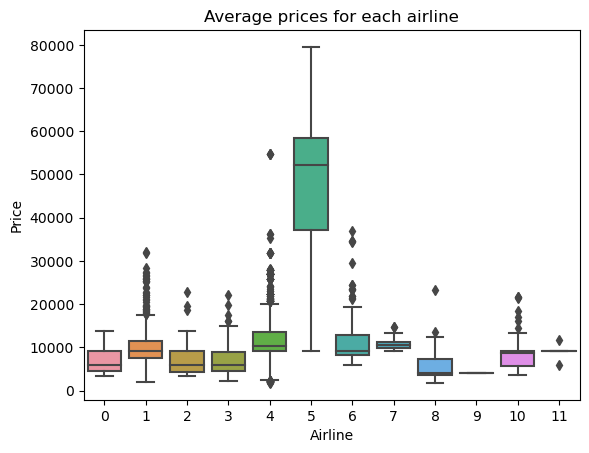

In [231]:
sns.boxplot(x='Airline',y='Price', data=df)
plt.title('Average prices for each airline')

Text(0, 0.5, 'Price of the flight')

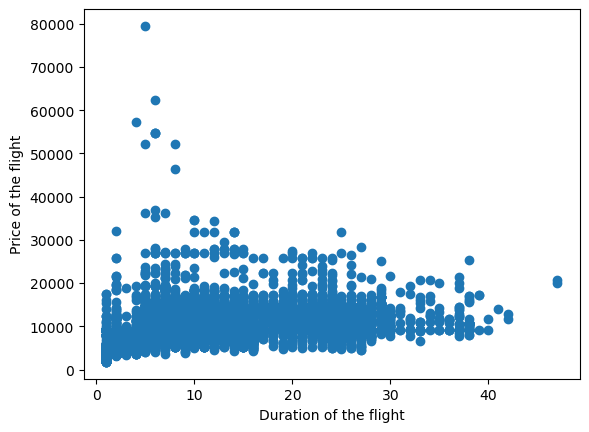

In [222]:
plt.scatter(df['dur_hour'],df['Price'])
plt.xlabel('Duration of the flight')
plt.ylabel('Price of the flight')

<BarContainer object of 13350 artists>

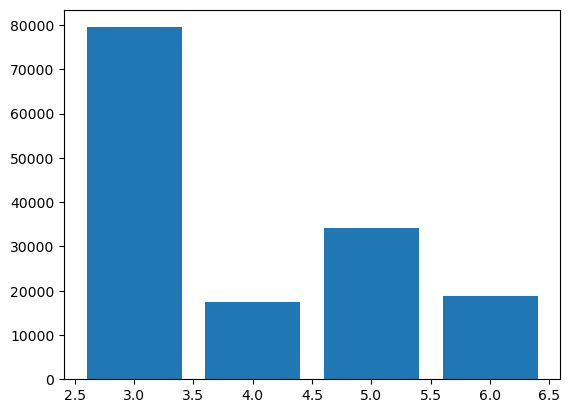

In [224]:
plt.bar(df['month'],df['Price'])
plt.xlabel('Month')
plt.ylabel('Price')

Text(0.5, 1.0, 'Count of flights per airline')

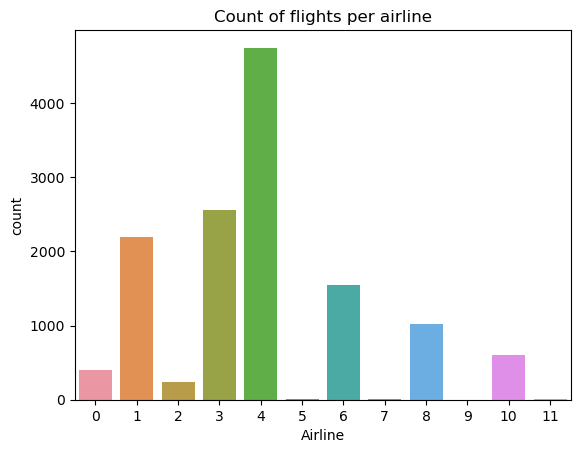

In [226]:
sns.countplot(x='Airline', data=df)
plt.title('Count of flights per airline')

Text(0.5, 1.0, 'Count of flights for each source')

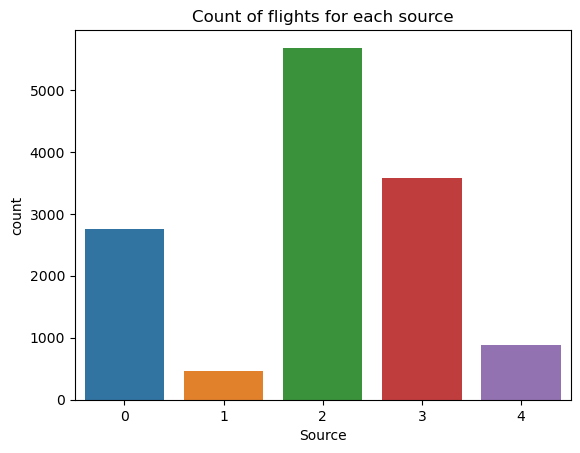

In [228]:
sns.countplot(x='Source', data=df)
plt.title('Count of flights for each source')

Text(0.5, 1.0, 'Count of flights for each destination')

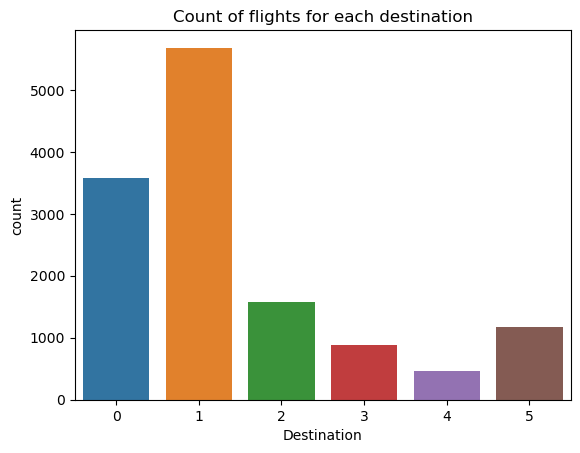

In [229]:
sns.countplot(x='Destination', data=df)
plt.title('Count of flights for each destination')

Text(0.5, 1.0, 'Distribution of prices')

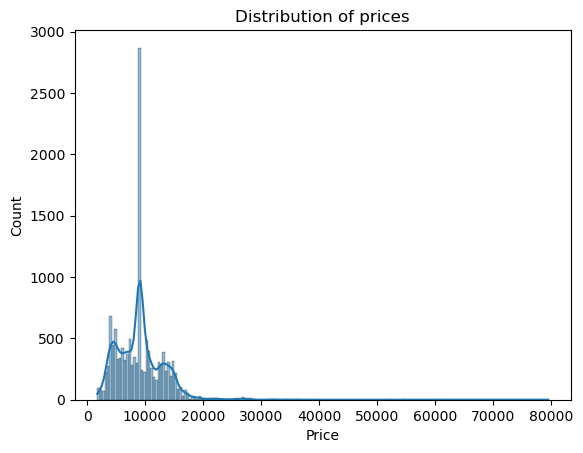

In [230]:
sns.histplot(df['Price'], kde=True)
plt.title('Distribution of prices')

Text(0.5, 1.0, 'Average prices for each source')

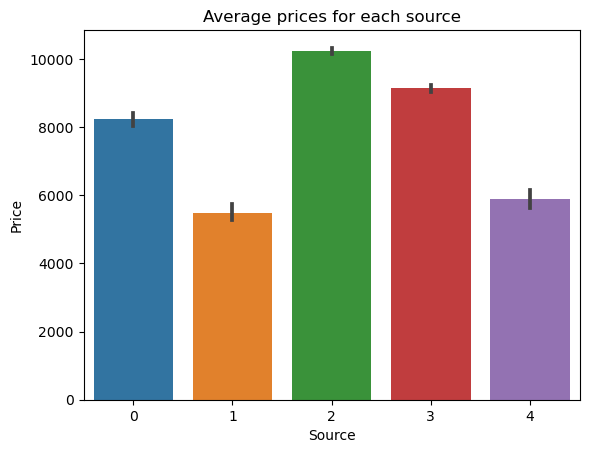

In [232]:
sns.barplot(x='Source', y='Price', data=df)
plt.title('Average prices for each source')

Text(0.5, 1.0, 'Average prices for each destination')

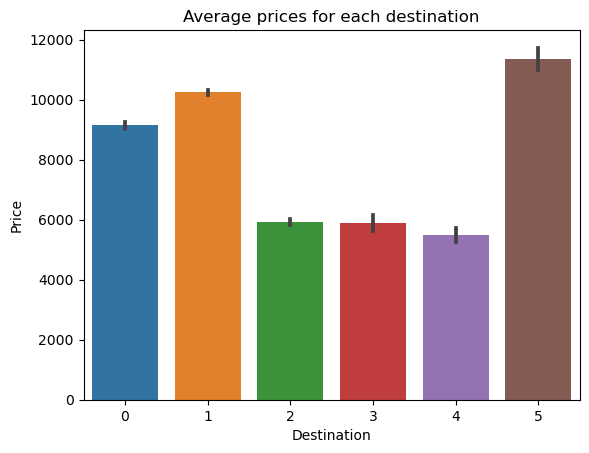

In [233]:
sns.barplot(x='Destination', y='Price', data=df)
plt.title('Average prices for each destination')

Text(0.5, 1.0, 'Correlation between features')

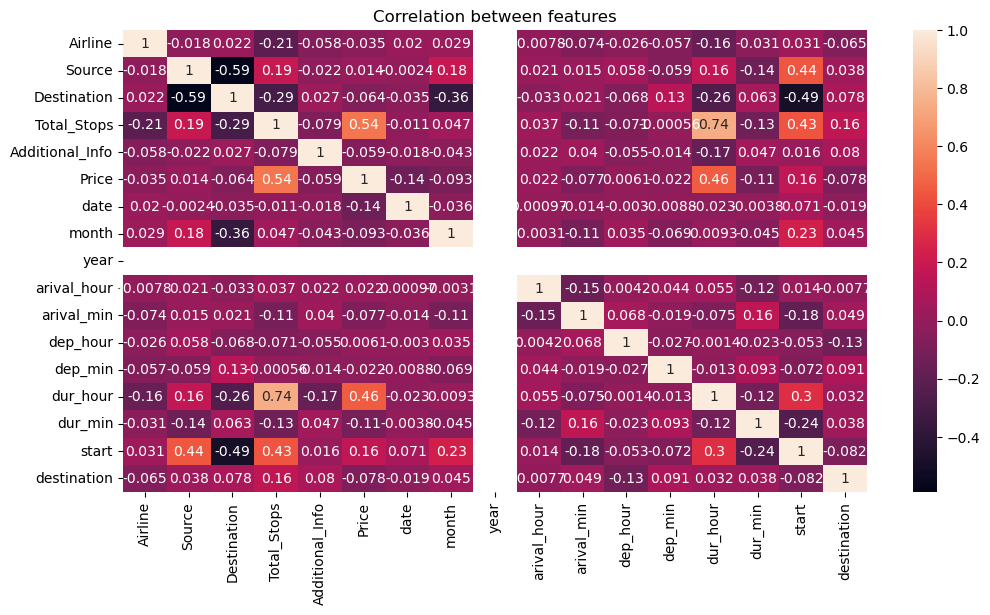

In [241]:
plt.figure(figsize=(12, 6))
sns.heatmap(df.corr(), annot=True)
plt.title('Correlation between features')